# 🧭 Task 1: Environment Creation and Problem Formation

## ✅ 1.1 Environment Design
- 20 path segments
- Chosen area: Ringwood Station & Eastland
- Accessibility data includes: ramps, slopes, and obstacles

C:\Users\SHILPA\AppData\Local\Temp\ipykernel_23108\2593460200.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  node_colors = plt.cm.get_cmap('tab20', len(points))


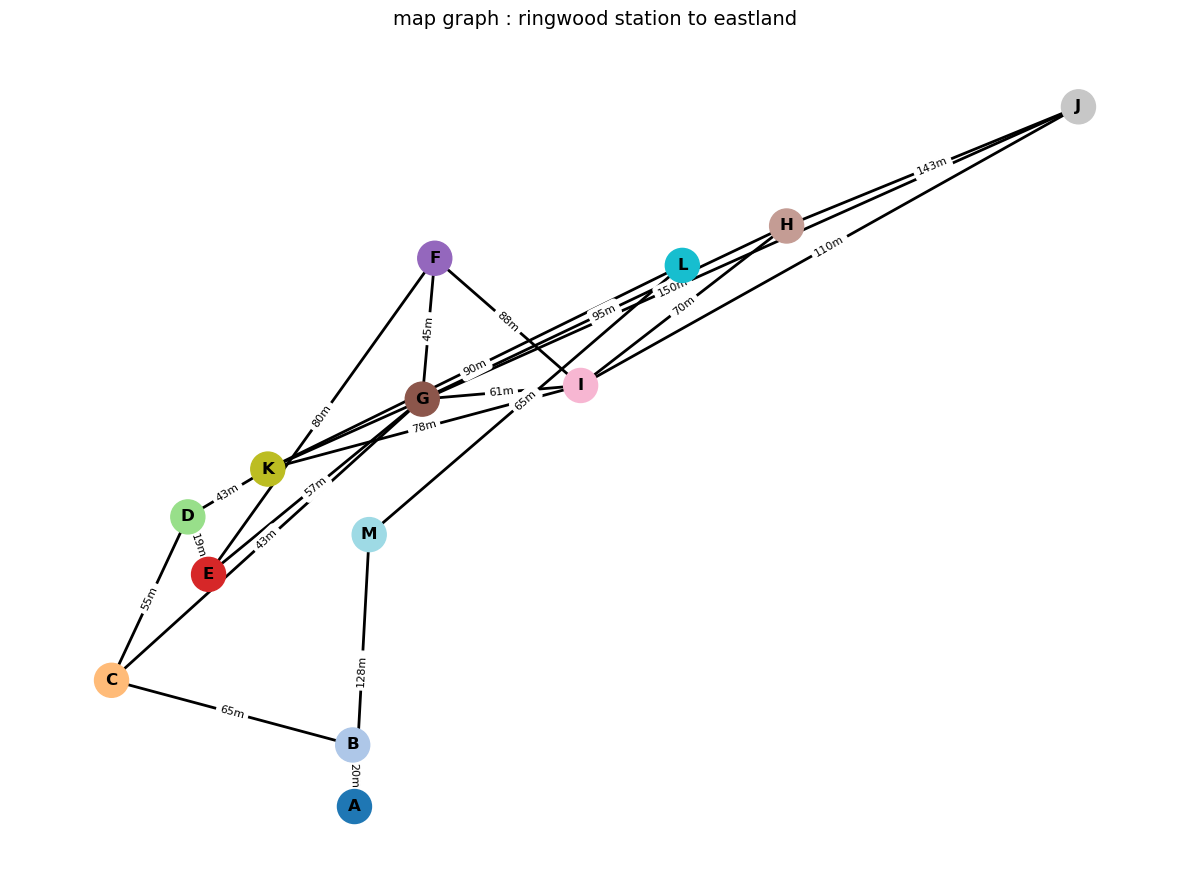

In [81]:
# import required libraries after code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# --- Step 1: Define 13 points with names and coordinates (lat, lon) ---
points = {
    'A': (-37.8156505, 145.2294636),
    'B': (-37.8154740, 145.2294588),
    'C': (-37.8152886, 145.2288074),
    'D': (-37.8148201, 145.2290135),
    'E': (-37.8149849, 145.2290695),
    'F': (-37.8140786, 145.2296805),
    'G': (-37.8144825, 145.2296467),
    'H': (-37.8139861, 145.2306309),
    'I': (-37.8144433, 145.2300744),
    'J': (-37.8136444, 145.2314192),
    'K': (-37.8146830, 145.2292295),
    'L': (-37.8140991, 145.2303492),
    'M': (-37.8148709, 145.2295034)
}

# --- Step 2: Define 20 selected segments with approximate distances (in meters) ---
segments = [
    ('A', 'B', 20),
    ('B', 'C', 65),
    ('C', 'D', 55),
    ('D', 'E', 19),
    ('E', 'F', 80),
    ('F', 'G', 45),
    ('G', 'H', 95),
    ('H', 'I', 70),
    ('I', 'J', 110),
    ('J', 'K', 150),
    ('K', 'L', 90),
    ('L', 'M', 65),
    ('M', 'A', 128),
    ('D', 'K', 43),
    ('C', 'G', 43),
    ('E', 'G', 57),
    ('G', 'I', 61),
    ('F', 'I', 88),
    ('K', 'I', 78),
    ('H', 'J', 143)
]

# --- Step 3: Create a graph using NetworkX ---
G = nx.Graph()

# Add nodes with positions
for point, (lat, lon) in points.items():
    G.add_node(point, pos=(lon, lat))  # lon = x, lat = y

# Add only the 20 selected edges
for u, v, dist in segments:
    G.add_edge(u, v, weight=dist)

# --- Step 4: Draw the graph ---
plt.figure(figsize=(12, 9))
pos = nx.get_node_attributes(G, 'pos')

# Draw nodes with unique colors
node_colors = plt.cm.get_cmap('tab20', len(points))
nx.draw_networkx_nodes(G, pos, node_color=[node_colors(i) for i in range(len(points))], node_size=600)

# Draw edges (segments)
nx.draw_networkx_edges(G, pos, width=2)

# Draw edge labels (distances)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d}m" for (u, v), d in edge_labels.items()}, font_size=8)

# Draw point labels (A to M)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

point_descriptions = {
    'A': "Ringwood Station Entrance",
    'B': "Bus Interchange",
    'C': "Maroondah Hwy Crossing",
    'D': "Realm Library",
    'E': "Town Square (Water Fountain)",
    'F': "Eastland South Entrance (JB Hi-Fi)",
    'G': "Outdoor Seating Area",
    'H': "Public Lift at Eastland",
    'I': "Level 1 Food Court",
    'J': "Accessible Toilet (Eastland L1)",
    'K': "Coles Exit / North Entrance",
    'L': "Parking Ramp Entry",
    'M': "Accessible Parking Bay (Car Park A)"
}
plt.title("map graph : ringwood station to eastland", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()






# ADJENCY MATRIX

In [12]:
import pandas as pd
import networkx as nx

# Define graph and segments (same as before)
points = {
    'A': (-37.8156505, 145.2294636), 'B': (-37.8154740, 145.2294588), 'C': (-37.8152886, 145.2288074),
    'D': (-37.8148201, 145.2290135), 'E': (-37.8149849, 145.2290695), 'F': (-37.8140786, 145.2296805),
    'G': (-37.8144825, 145.2296467), 'H': (-37.8139861, 145.2306309), 'I': (-37.8144433, 145.2300744),
    'J': (-37.8136444, 145.2314192), 'K': (-37.8146830, 145.2292295), 'L': (-37.8140991, 145.2303492),
    'M': (-37.8148709, 145.2295034)
}

segments = [
    ('A', 'B', 20), ('B', 'C', 65), ('C', 'D', 55), ('D', 'E', 19), ('E', 'F', 80),
    ('F', 'G', 45), ('G', 'H', 95), ('H', 'I', 70), ('I', 'J', 110), ('J', 'K', 150),
    ('K', 'L', 90), ('L', 'M', 65), ('M', 'A', 128), ('D', 'K', 43), ('C', 'G', 43),
    ('E', 'G', 57), ('G', 'I', 61), ('F', 'I', 88), ('K', 'I', 78), ('H', 'J', 143)
]

# Create the graph
G = nx.Graph()
for u, v, cost in segments:
    G.add_edge(u, v, weight=cost)

# Create an adjacency matrix showing only direct connections
nodes = list(points.keys())
adj_matrix = pd.DataFrame("-", index=nodes, columns=nodes)

for u, v, cost in segments:
    adj_matrix.at[u, v] = cost
    adj_matrix.at[v, u] = cost  # because it's an undirected graph

# Show the result
adj_matrix


,A,B,C,D,E,F,G,H,I,J,K,L,M
A,-,20,-,-,-,-,-,-,-,-,-,-,128
B,20,-,65,-,-,-,-,-,-,-,-,-,-
C,-,65,-,55,-,-,43,-,-,-,-,-,-
D,-,-,55,-,19,-,-,-,-,-,43,-,-
E,-,-,-,19,-,80,57,-,-,-,-,-,-
F,-,-,-,-,80,-,45,-,88,-,-,-,-
G,-,-,43,-,57,45,-,95,61,-,-,-,-
H,-,-,-,-,-,-,95,-,70,143,-,-,-
I,-,-,-,-,-,88,61,70,-,110,78,-,-
J,-,-,-,-,-,-,-,143,110,-,150,-,-


# ✅ 1.2 Problem and Map Justification
### This map was built based on reasonable assumptions of real-world accessibility constraints using mapping tools and domain knowledge.

C:\Users\SHILPA\AppData\Local\Temp\ipykernel_23108\3089190222.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  node_colors = plt.cm.get_cmap('tab20', len(points))


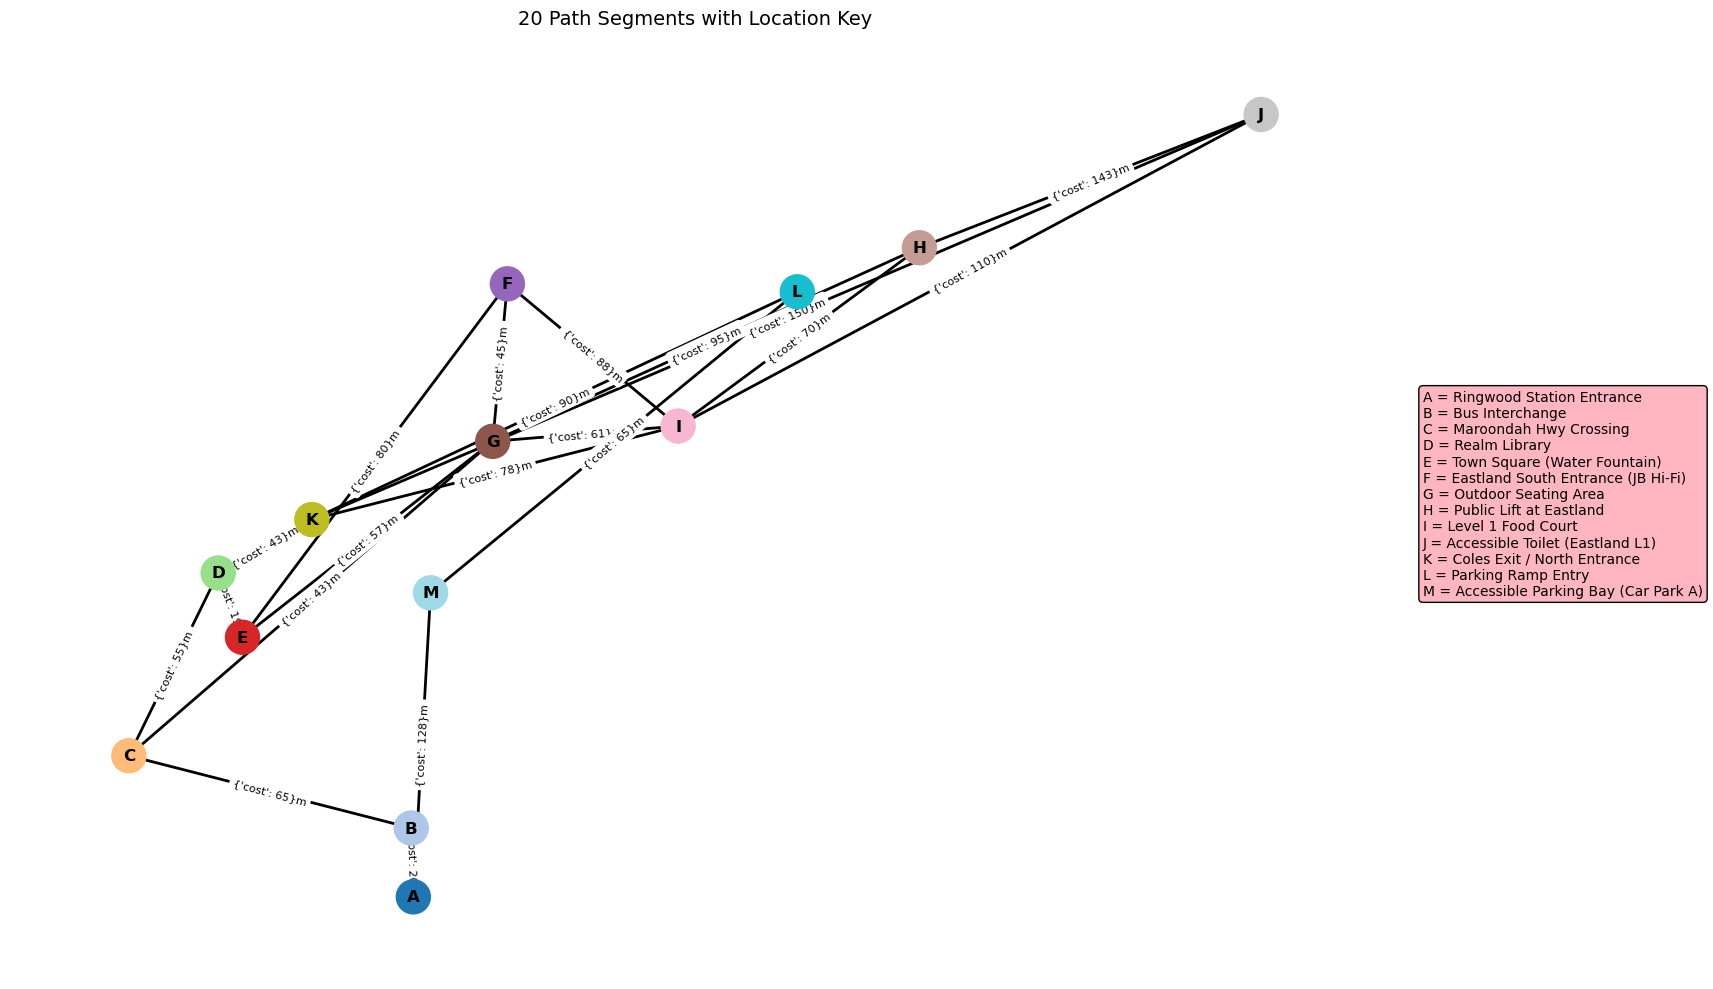

In [61]:
import matplotlib.pyplot as plt
import networkx as nx


# --- Build the graph ---
G = nx.Graph()
for point, (lat, lon) in points.items():
    G.add_node(point, pos=(lon, lat))

for u, v, dist in segments:
    G.add_edge(u, v, cost=dist)

# --- Draw the graph ---
plt.figure(figsize=(14, 10))
pos = nx.get_node_attributes(G, 'pos')

# Unique colors for each node
node_colors = plt.cm.get_cmap('tab20', len(points))
nx.draw_networkx_nodes(G, pos, node_color=[node_colors(i) for i in range(len(points))], node_size=600)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d}m" for (u, v, d) in G.edges(data=True)}, font_size=8)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# --- Add a legend box on the side ---
legend_text = "\n".join([f"{k} = {v}" for k, v in point_descriptions.items()])
plt.gcf().text(1.02, 0.5, legend_text, fontsize=10, va='center', bbox=dict(boxstyle="round", fc="lightpink", ec="black"))

plt.title("20 Path Segments with Location Key", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


# 🤖 Task 2: Basic Navigation Implementation

## ✅ 2.1 A* Implementation with Distance Cost

In [8]:
def a_star_matrix(start, goal):
    ...


## ✅ 2.2 Testing with Sample Start-End Points

Shortest path from A (Ringwood Station Entrance) to F (Eastland South Entrance (JB Hi-Fi)): ['A', 'B', 'C', 'G', 'F']
Total cost: 173 meters



C:\Users\SHILPA\AppData\Local\Temp\ipykernel_18228\1015647356.py:123: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  node_colors = plt.cm.get_cmap('tab20', len(points))


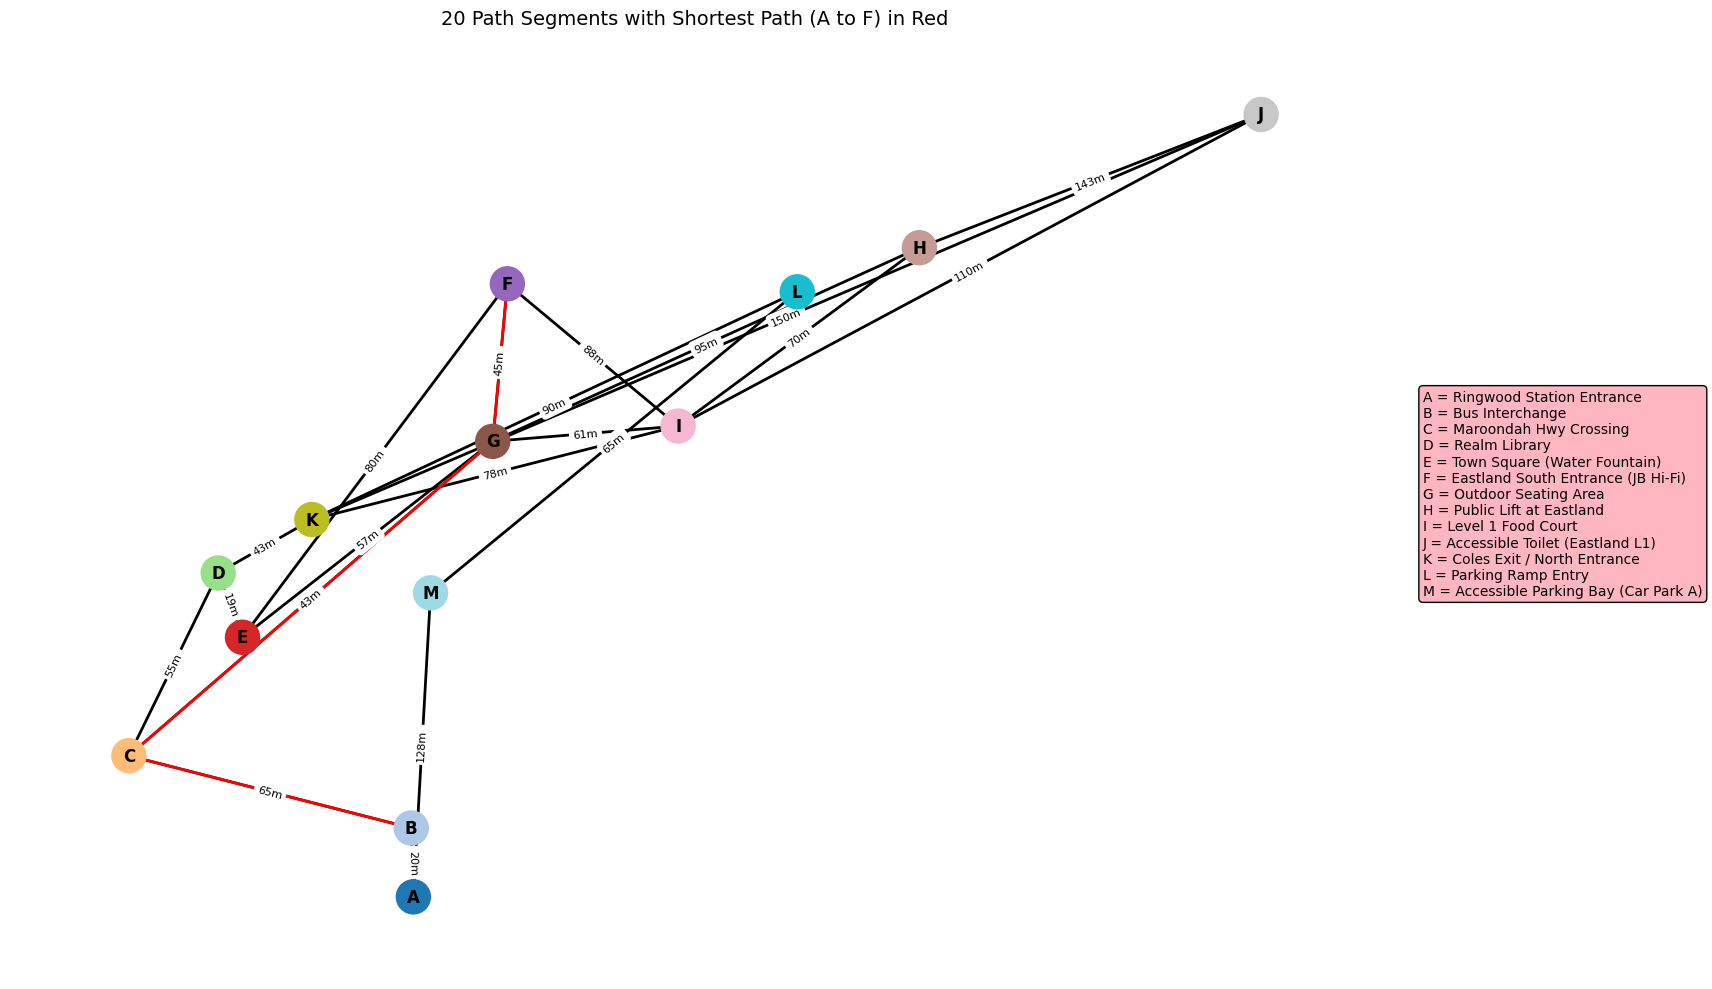

Shortest path from C (Maroondah Hwy Crossing) to H (Public Lift at Eastland): ['C', 'G', 'H']
Total cost: 138 meters



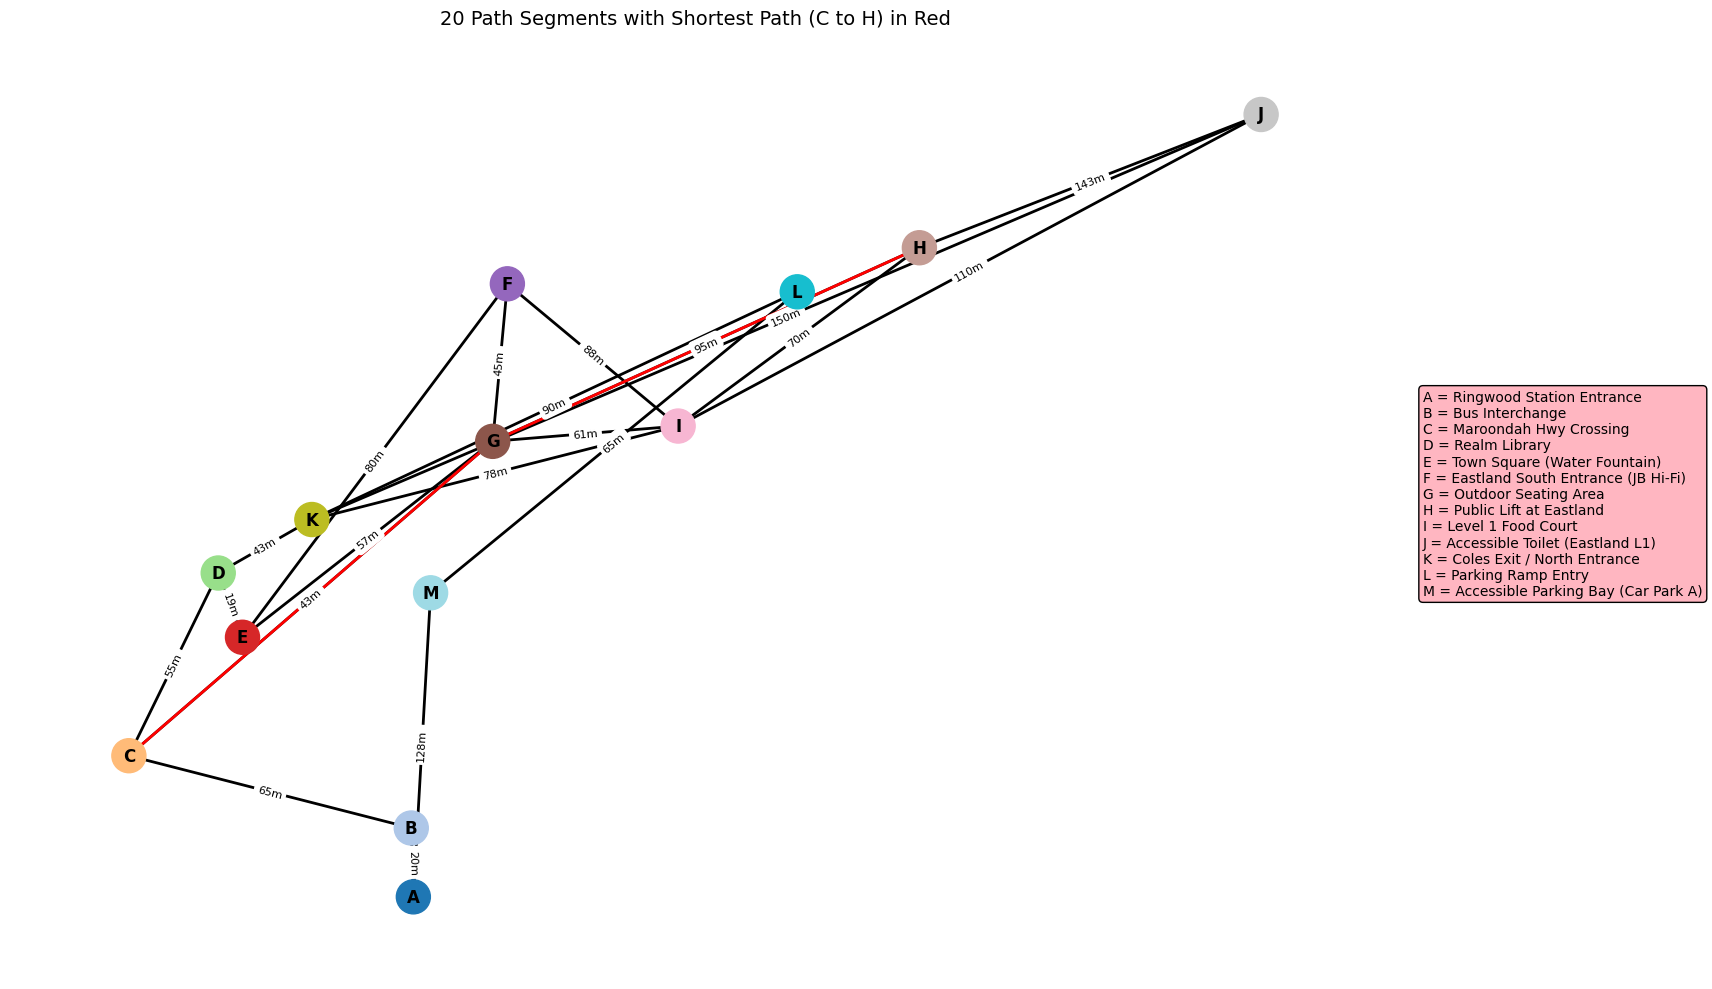

Shortest path from E (Town Square (Water Fountain)) to J (Accessible Toilet (Eastland L1)): ['E', 'D', 'K', 'J']
Total cost: 212 meters



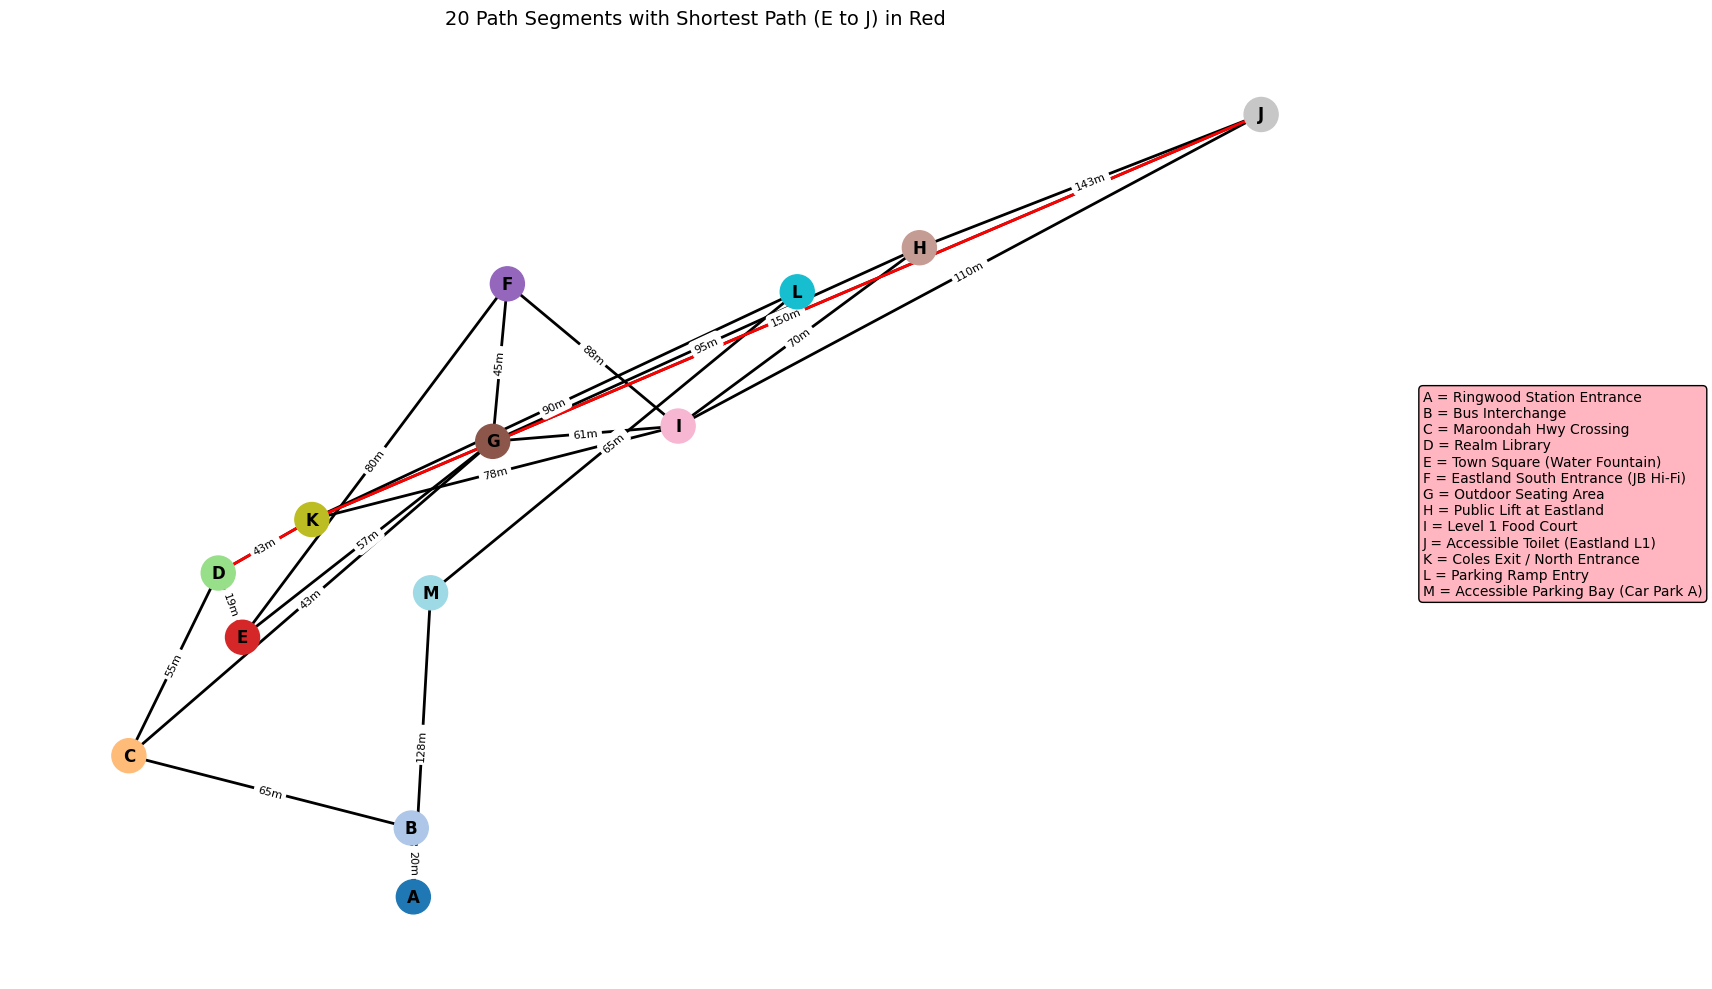

Shortest path from K (Coles Exit / North Entrance) to M (Accessible Parking Bay (Car Park A)): ['K', 'L', 'M']
Total cost: 155 meters



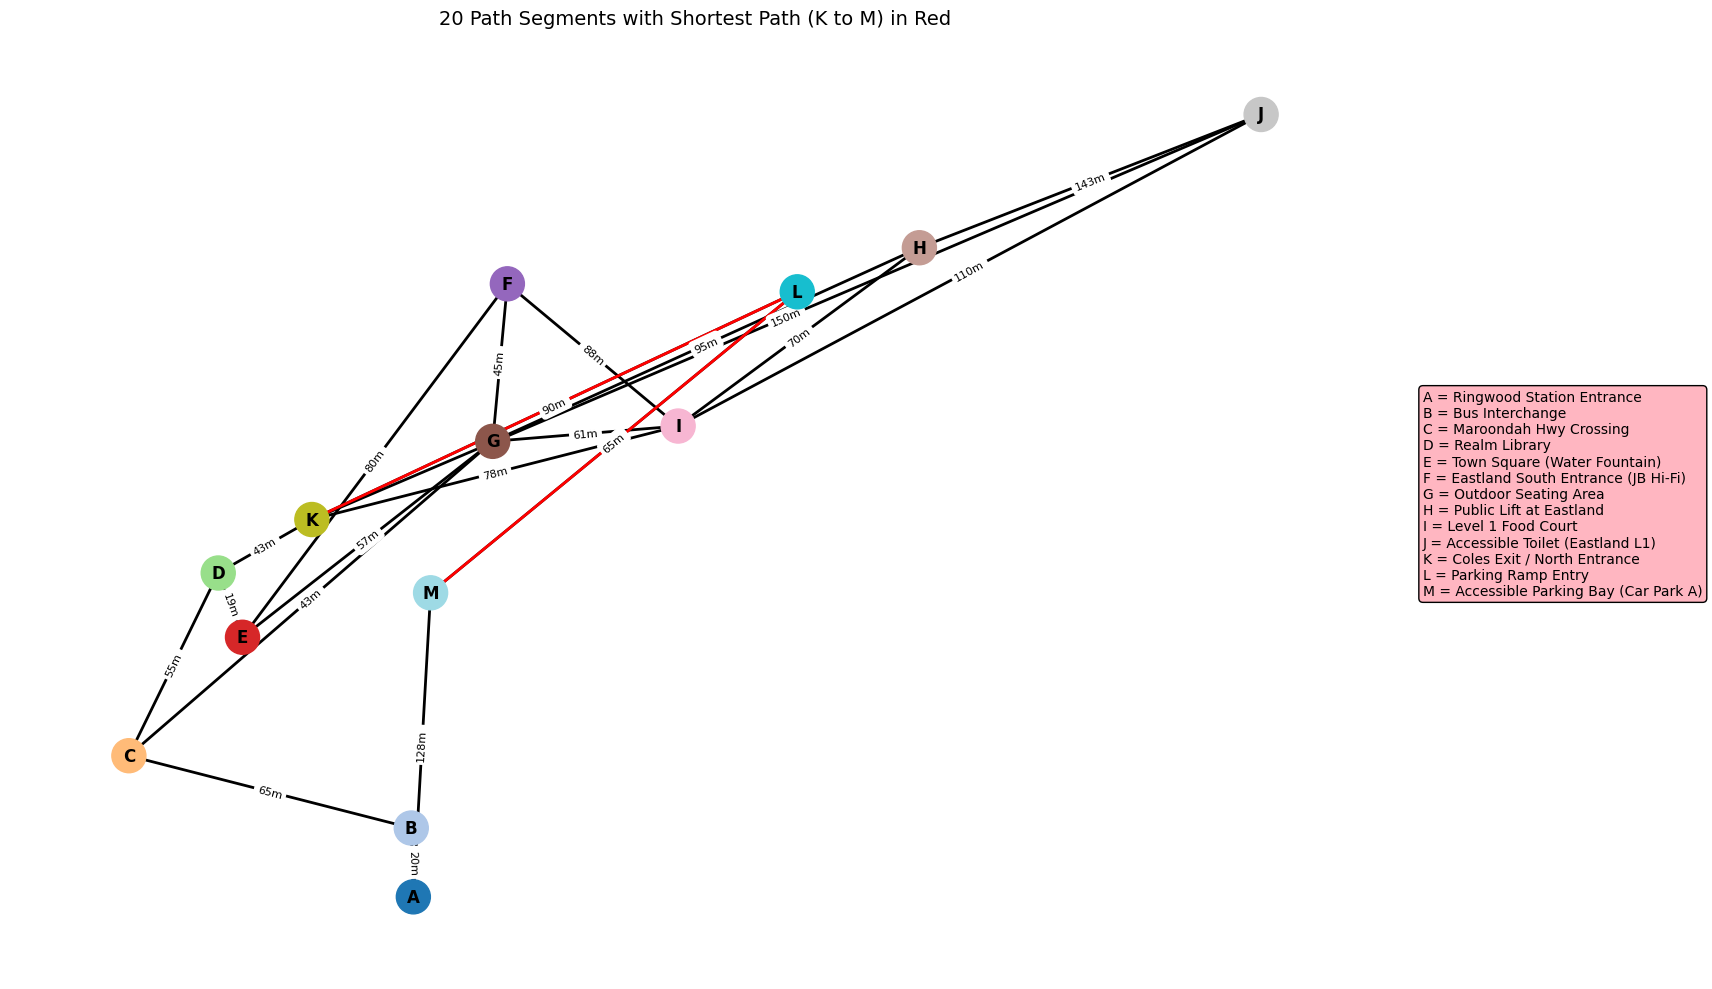

Shortest path from B (Bus Interchange) to I (Level 1 Food Court): ['B', 'C', 'G', 'I']
Total cost: 169 meters



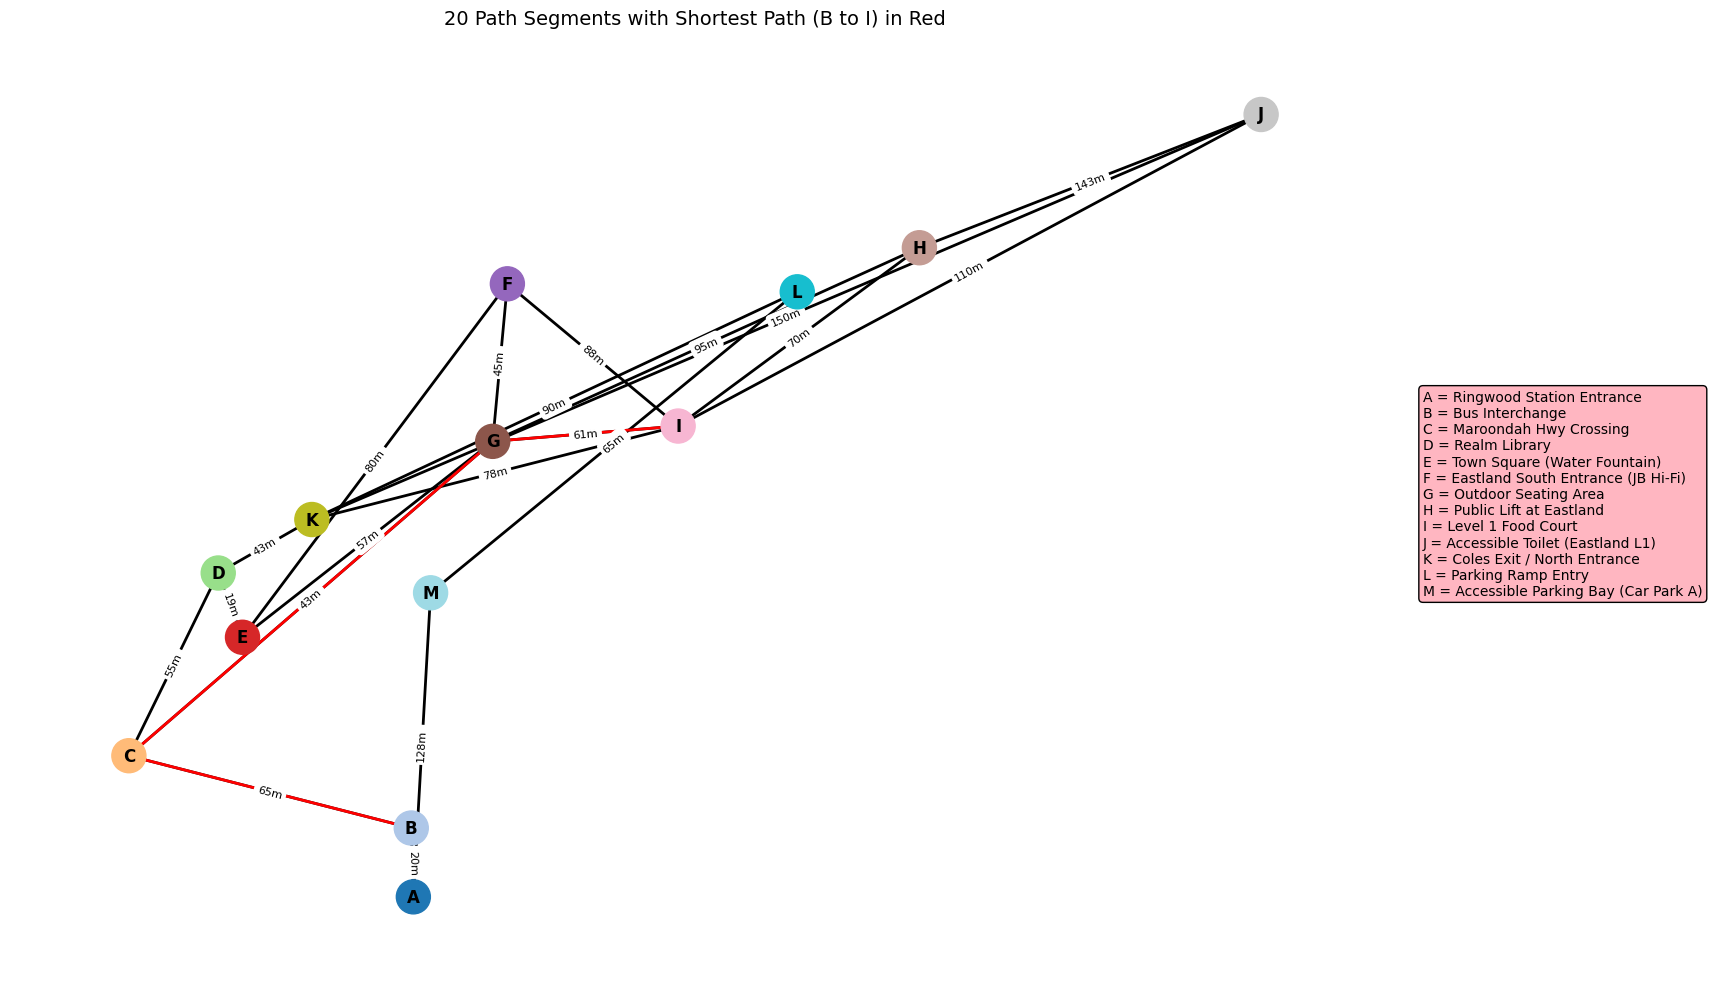

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# --- Define points with coordinates (lat, lon) ---
points = {
    'A': (-37.8156505, 145.2294636),
    'B': (-37.8154740, 145.2294588),
    'C': (-37.8152886, 145.2288074),
    'D': (-37.8148201, 145.2290135),
    'E': (-37.8149849, 145.2290695),
    'F': (-37.8140786, 145.2296805),
    'G': (-37.8144825, 145.2296467),
    'H': (-37.8139861, 145.2306309),
    'I': (-37.8144433, 145.2300744),
    'J': (-37.8136444, 145.2314192),
    'K': (-37.8146830, 145.2292295),
    'L': (-37.8140991, 145.2303492),
    'M': (-37.8148709, 145.2295034)
}

# --- Define all segments (20 path segments) ---
segments = [
    ('A', 'B', 20), ('B', 'C', 65), ('C', 'D', 55), ('D', 'E', 19), ('E', 'F', 80),
    ('F', 'G', 45), ('G', 'H', 95), ('H', 'I', 70), ('I', 'J', 110), ('J', 'K', 150),
    ('K', 'L', 90), ('L', 'M', 65), ('M', 'A', 128), ('D', 'K', 43), ('C', 'G', 43),
    ('E', 'G', 57), ('G', 'I', 61), ('F', 'I', 88), ('K', 'I', 78), ('H', 'J', 143)
]

# --- Point descriptions for the legend ---
point_descriptions = {
    'A': "Ringwood Station Entrance",
    'B': "Bus Interchange",
    'C': "Maroondah Hwy Crossing",
    'D': "Realm Library",
    'E': "Town Square (Water Fountain)",
    'F': "Eastland South Entrance (JB Hi-Fi)",
    'G': "Outdoor Seating Area",
    'H': "Public Lift at Eastland",
    'I': "Level 1 Food Court",
    'J': "Accessible Toilet (Eastland L1)",
    'K': "Coles Exit / North Entrance",
    'L': "Parking Ramp Entry",
    'M': "Accessible Parking Bay (Car Park A)"
}

# --- Build the graph ---
G = nx.Graph()
for point, (lat, lon) in points.items():
    G.add_node(point, pos=(lon, lat))

for u, v, dist in segments:
    G.add_edge(u, v, cost=dist)

# --- A* Algorithm ---
def heuristic(node, goal, points):
    """Euclidean distance heuristic between two nodes based on their coordinates."""
    x1, y1 = points[node]
    x2, y2 = points[goal]
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5 * 1000  # Scaled to match meters

def a_star(graph, start, goal, points):
    """A* algorithm implementation."""
    open_set = []
    heapq.heappush(open_set, (0, start))  # (f_score, node)
    came_from = {}
    g_score = {node: float('infinity') for node in graph.nodes}
    g_score[start] = 0
    f_score = {node: float('infinity') for node in graph.nodes}
    f_score[start] = heuristic(start, goal, points)

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], g_score[goal]

        for neighbor in graph.neighbors(current):
            tentative_g_score = g_score[current] + graph[current][neighbor]['cost']

            if tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal, points)
                if neighbor not in [item[1] for item in open_set]:
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None, float('infinity')  # No path found

# --- Test 5 pairs of start and goal points ---
test_cases = [
    ('A', 'F'),  # Ringwood Station to Eastland South Entrance
    ('C', 'H'),  # Maroondah Hwy Crossing to Public Lift
    ('E', 'J'),  # Town Square to Accessible Toilet
    ('K', 'M'),  # Coles Exit to Accessible Parking Bay
    ('B', 'I')   # Bus Interchange to Level 1 Food Court
]

# --- Visualize one test case at a time ---
for start_node, end_node in test_cases:
    path, total_cost = a_star(G, start_node, end_node, points)
    if path:
        print(f"Shortest path from {start_node} ({point_descriptions[start_node]}) to {end_node} ({point_descriptions[end_node]}): {path}")
        print(f"Total cost: {total_cost} meters\n")

        plt.figure(figsize=(14, 10))
        pos = nx.get_node_attributes(G, 'pos')

        # Draw all edges in black
        nx.draw_networkx_edges(G, pos, width=2, edge_color='black')

        # Draw shortest path edges in red
        if path:
            path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=2, edge_color='red')

        # Draw nodes
        node_colors = plt.cm.get_cmap('tab20', len(points))
        nx.draw_networkx_nodes(G, pos, node_color=[node_colors(i) for i in range(len(points))], node_size=600)

        # Add edge labels
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"{d['cost']}m" for (u, v, d) in G.edges(data=True)}, font_size=8)

        # Add node labels
        nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

        # --- Add a legend box on the side ---
        legend_text = "\n".join([f"{k} = {v}" for k, v in point_descriptions.items()])
        plt.gcf().text(1.02, 0.5, legend_text, fontsize=10, va='center', bbox=dict(boxstyle="round", fc="lightpink", ec="black"))

        plt.title(f"20 Path Segments with Shortest Path ({start_node} to {end_node}) in Red", fontsize=14)
        plt.axis("off")
        plt.tight_layout()
        plt.show()
    else:
        print(f"No path found from {start_node} to {end_node}\n")

### Adjency matrix depicting shortest distance using A* algorithm

In [4]:
import pandas as pd
import networkx as nx
import heapq

# Define points and descriptions
points = {
    'A': (-37.8156505, 145.2294636), 'B': (-37.8154740, 145.2294588), 'C': (-37.8152886, 145.2288074),
    'D': (-37.8148201, 145.2290135), 'E': (-37.8149849, 145.2290695), 'F': (-37.8140786, 145.2296805),
    'G': (-37.8144825, 145.2296467), 'H': (-37.8139861, 145.2306309), 'I': (-37.8144433, 145.2300744),
    'J': (-37.8136444, 145.2314192), 'K': (-37.8146830, 145.2292295), 'L': (-37.8140991, 145.2303492),
    'M': (-37.8148709, 145.2295034)
}

segments = [
    ('A', 'B', 20), ('B', 'C', 65), ('C', 'D', 55), ('D', 'E', 19), ('E', 'F', 80),
    ('F', 'G', 45), ('G', 'H', 95), ('H', 'I', 70), ('I', 'J', 110), ('J', 'K', 150),
    ('K', 'L', 90), ('L', 'M', 65), ('M', 'A', 128), ('D', 'K', 43), ('C', 'G', 43),
    ('E', 'G', 57), ('G', 'I', 61), ('F', 'I', 88), ('K', 'I', 78), ('H', 'J', 143)
]

point_descriptions = {
    'A': "Ringwood Station Entrance", 'B': "Bus Interchange", 'C': "Maroondah Hwy Crossing",
    'D': "Realm Library", 'E': "Town Square (Water Fountain)", 'F': "Eastland South Entrance (JB Hi-Fi)",
    'G': "Outdoor Seating Area", 'H': "Public Lift at Eastland", 'I': "Level 1 Food Court",
    'J': "Accessible Toilet (Eastland L1)", 'K': "Coles Exit / North Entrance",
    'L': "Parking Ramp Entry", 'M': "Accessible Parking Bay (Car Park A)"
}

# Build the graph
G = nx.Graph()
for point, (lat, lon) in points.items():
    G.add_node(point, pos=(lon, lat))
for u, v, dist in segments:
    G.add_edge(u, v, cost=dist)

# Heuristic function
def heuristic(node, goal, points):
    x1, y1 = points[node]
    x2, y2 = points[goal]
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5 * 1000

# A* algorithm returning path and cost
def a_star_with_path(graph, start, goal, points):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph.nodes}
    f_score[start] = heuristic(start, goal, points)

    while open_set:
        current = heapq.heappop(open_set)[1]
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return g_score[goal], path
        for neighbor in graph.neighbors(current):
            tentative = g_score[current] + graph[current][neighbor]['cost']
            if tentative < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative
                f_score[neighbor] = tentative + heuristic(neighbor, goal, points)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return float('inf'), []

# Create DataFrame with descriptive names
nodes_named = [point_descriptions[n] for n in points]
a_star_detail_matrix = pd.DataFrame(index=nodes_named, columns=nodes_named)

for start in points:
    for end in points:
        start_name = point_descriptions[start]
        end_name = point_descriptions[end]
        if start == end:
            a_star_detail_matrix.loc[start_name, end_name] = "0m | Self"
        else:
            cost, path = a_star_with_path(G, start, end, points)
            if cost < float('inf'):
                named_path = " → ".join([point_descriptions[p] for p in path])
                a_star_detail_matrix.loc[start_name, end_name] = f"{int(cost)}m | {named_path}"
            else:
                a_star_detail_matrix.loc[start_name, end_name] = "-"

# Display the result (Jupyter-style output)
a_star_detail_matrix.style.set_caption("A* All-Pairs Shortest Path with Descriptive Names and Paths")


,Ringwood Station Entrance,Bus Interchange,Maroondah Hwy Crossing,Realm Library,Town Square (Water Fountain),Eastland South Entrance (JB Hi-Fi),Outdoor Seating Area,Public Lift at Eastland,Level 1 Food Court,Accessible Toilet (Eastland L1),Coles Exit / North Entrance,Parking Ramp Entry,Accessible Parking Bay (Car Park A)
Ringwood Station Entrance,0m | Self,20m | Ringwood Station Entrance → Bus Interchange,85m | Ringwood Station Entrance → Bus Interchange → Maroondah Hwy Crossing,140m | Ringwood Station Entrance → Bus Interchange → Maroondah Hwy Crossing → Realm Library,159m | Ringwood Station Entrance → Bus Interchange → Maroondah Hwy Crossing → Realm Library → Town Square (Water Fountain),173m | Ringwood Station Entrance → Bus Interchange → Maroondah Hwy Crossing → Outdoor Seating Area → Eastland South Entrance (JB Hi-Fi),128m | Ringwood Station Entrance → Bus Interchange → Maroondah Hwy Crossing → Outdoor Seating Area,223m | Ringwood Station Entrance → Bus Interchange → Maroondah Hwy Crossing → Outdoor Seating Area → Public Lift at Eastland,189m | Ringwood Station Entrance → Bus Interchange → Maroondah Hwy Crossing → Outdoor Seating Area → Level 1 Food Court,299m | Ringwood Station Entrance → Bus Interchange → Maroondah Hwy Crossing → Outdoor Seating Area → Level 1 Food Court → Accessible Toilet (Eastland L1),183m | Ringwood Station Entrance → Bus Interchange → Maroondah Hwy Crossing → Realm Library → Coles Exit / North Entrance,193m | Ringwood Station Entrance → Accessible Parking Bay (Car Park A) → Parking Ramp Entry,128m | Ringwood Station Entrance → Accessible Parking Bay (Car Park A)
Bus Interchange,20m | Bus Interchange → Ringwood Station Entrance,0m | Self,65m | Bus Interchange → Maroondah Hwy Crossing,120m | Bus Interchange → Maroondah Hwy Crossing → Realm Library,139m | Bus Interchange → Maroondah Hwy Crossing → Realm Library → Town Square (Water Fountain),153m | Bus Interchange → Maroondah Hwy Crossing → Outdoor Seating Area → Eastland South Entrance (JB Hi-Fi),108m | Bus Interchange → Maroondah Hwy Crossing → Outdoor Seating Area,203m | Bus Interchange → Maroondah Hwy Crossing → Outdoor Seating Area → Public Lift at Eastland,169m | Bus Interchange → Maroondah Hwy Crossing → Outdoor Seating Area → Level 1 Food Court,279m | Bus Interchange → Maroondah Hwy Crossing → Outdoor Seating Area → Level 1 Food Court → Accessible Toilet (Eastland L1),163m | Bus Interchange → Maroondah Hwy Crossing → Realm Library → Coles Exit / North Entrance,213m | Bus Interchange → Ringwood Station Entrance → Accessible Parking Bay (Car Park A) → Parking Ramp Entry,148m | Bus Interchange → Ringwood Station Entrance → Accessible Parking Bay (Car Park A)
Maroondah Hwy Crossing,85m | Maroondah Hwy Crossing → Bus Interchange → Ringwood Station Entrance,65m | Maroondah Hwy Crossing → Bus Interchange,0m | Self,55m | Maroondah Hwy Crossing → Realm Library,74m | Maroondah Hwy Crossing → Realm Library → Town Square (Water Fountain),88m | Maroondah Hwy Crossing → Outdoor Seating Area → Eastland South Entrance (JB Hi-Fi),43m | Maroondah Hwy Crossing → Outdoor Seating Area,138m | Maroondah Hwy Crossing → Outdoor Seating Area → Public Lift at Eastland,104m | Maroondah Hwy Crossing → Outdoor Seating Area → Level 1 Food Court,214m | Maroondah Hwy Crossing → Outdoor Seating Area → Level 1 Food Court → Accessible Toilet (Eastland L1),98m | Maroondah Hwy Crossing → Realm Library → Coles Exit / North Entrance,188m | Maroondah Hwy Crossing → Realm Library → Coles Exit / North Entrance → Parking Ramp Entry,213m | Maroondah Hwy Crossing → Bus Interchange → Ringwood Station Entrance → Accessible Parking Bay (Car Park A)
Realm Library,140m | Realm Library → Maroondah Hwy Crossing → Bus Interchange → Ringwood Station Entrance,120m | Realm Library → Maroondah Hwy Crossing → Bus Interchange,55m | Realm Library → Maroondah Hwy Crossing,0m | Self,19m | Realm Library → Town Square (Water Fountain),99m | Realm Library → Town Square (Water Fountain) → Eastland South Entra

# 🔍 Task 3: Heuristics Comparison and Enhanced Constraints

## ✅ 3.1 Environment Expanded to 30 Path Segments


In [26]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import heapq

# --- Define points ---
points = {
    'A': (-37.8156505, 145.2294636),
    'B': (-37.8154740, 145.2294588),
    'C': (-37.8152886, 145.2288074),
    'D': (-37.8148201, 145.2290135),
    'E': (-37.8149849, 145.2290695),
    'F': (-37.8140786, 145.2296805),
    'G': (-37.8144825, 145.2296467),
    'H': (-37.8139861, 145.2306309),
    'I': (-37.8144433, 145.2300744),
    'J': (-37.8136444, 145.2314192),
    'K': (-37.8146830, 145.2292295),
    'L': (-37.8140991, 145.2303492),
    'M': (-37.8148709, 145.2295034)
}

# --- Define segments ---
segments_with_constraints = [
    ('A', 'B', 20, 0, True, False), ('B', 'C', 65, 2, False, False), ('C', 'D', 55, 0, True, False),
    ('D', 'E', 19, 0, True, False), ('E', 'F', 80, 3, False, False), ('F', 'G', 45, 1, True, False),
    ('G', 'H', 95, 5, False, False), ('H', 'I', 70, 2, True, False), ('I', 'J', 110, 6, False, True),
    ('J', 'K', 150, 4, False, False), ('K', 'L', 90, 3, True, False), ('L', 'M', 65, 2, True, False),
    ('M', 'A', 128, 5, False, False), ('D', 'K', 43, 0, True, False), ('C', 'G', 43, 1, True, False),
    ('E', 'G', 57, 2, False, False), ('G', 'I', 61, 3, True, False), ('F', 'I', 88, 4, False, False),
    ('K', 'I', 78, 2, True, False), ('H', 'J', 143, 7, False, True), ('J', 'M', 75, 4, True, False),
    ('M', 'L', 40, 0, True, False), ('L', 'K', 35, 1, True, False), ('D', 'M', 50, 0, True, False),
    ('A', 'C', 85, 1, True, False), ('B', 'D', 78, 2, True, False), ('C', 'F', 92, 4, False, False),
    ('D', 'G', 66, 2, True, False), ('E', 'I', 74, 3, True, False), ('F', 'J', 100, 5, False, True),
    
]


### ✅ 3.2 Constraints Included: slope, ramps, and obstacles

In [29]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import heapq
# --- Graph creation ---
G = nx.Graph()
for point, (lat, lon) in points.items():
    G.add_node(point, pos=(lon, lat))

for u, v, dist, slope, has_ramp, has_obstacle in segments_with_constraints:
    G.add_edge(u, v, cost=dist, slope=slope, has_ramp=has_ramp, has_obstacle=has_obstacle)



# TASK 4 - ALTERNATIVE PATHFINDING ALGORITHM (DJIKSTRA)

Distance-Based Paths:
   Start End          Path  Total Cost
0     A   F  [A, C, G, F]         173
1     C   H     [C, G, H]         138
2     E   J  [E, D, M, J]         144
3     K   M     [K, L, M]          75
4     B   I  [B, C, G, I]         169 

Accessibility-Based Paths:
   Start End                Path  Constraint Score
0     A   F        [A, C, G, F]                30
1     C   H     [C, D, K, I, H]                40
2     E   J        [E, D, M, J]                40
3     K   M           [K, D, M]                 0
4     B   I  [B, A, C, D, K, I]                30 

Comparison of Both:
   Start End Shortest Path  Total Distance  Constraint Score (Shortest)  \
0     A   F  [A, C, G, F]             173                           30   
1     C   H     [C, G, H]             138                          160   
2     E   J  [E, D, M, J]             144                           40   
3     K   M     [K, L, M]              75                           10   
4     B   I  [B, C, G, I] 

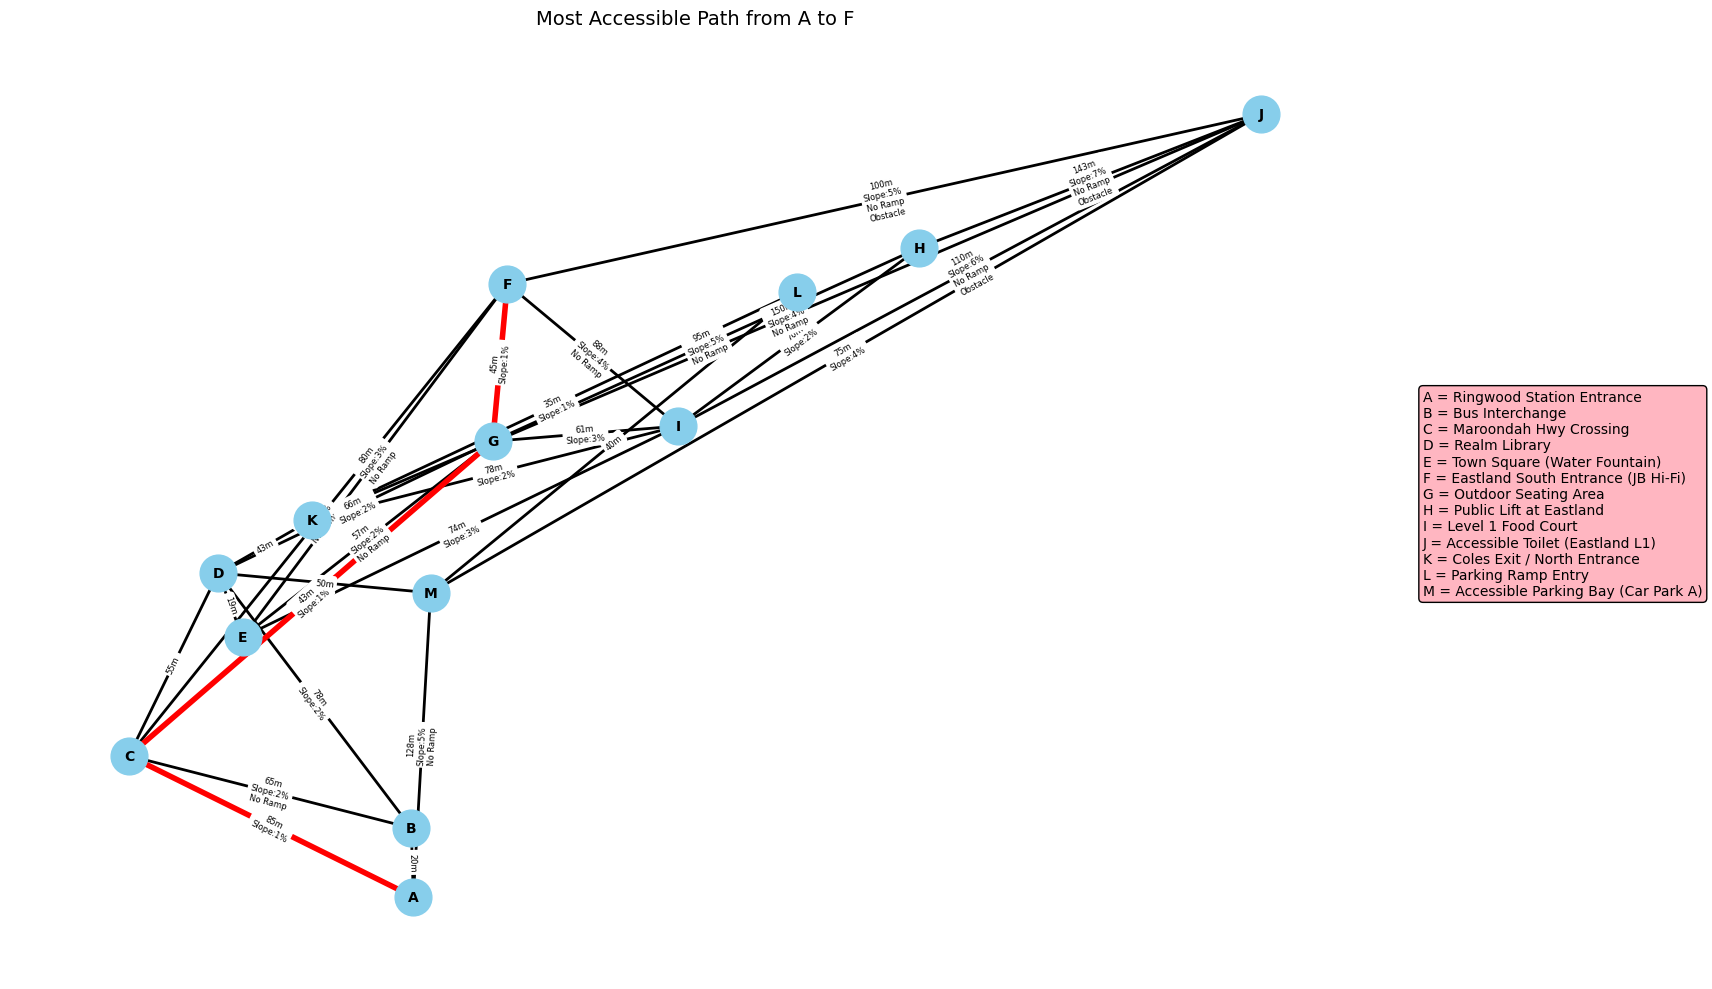

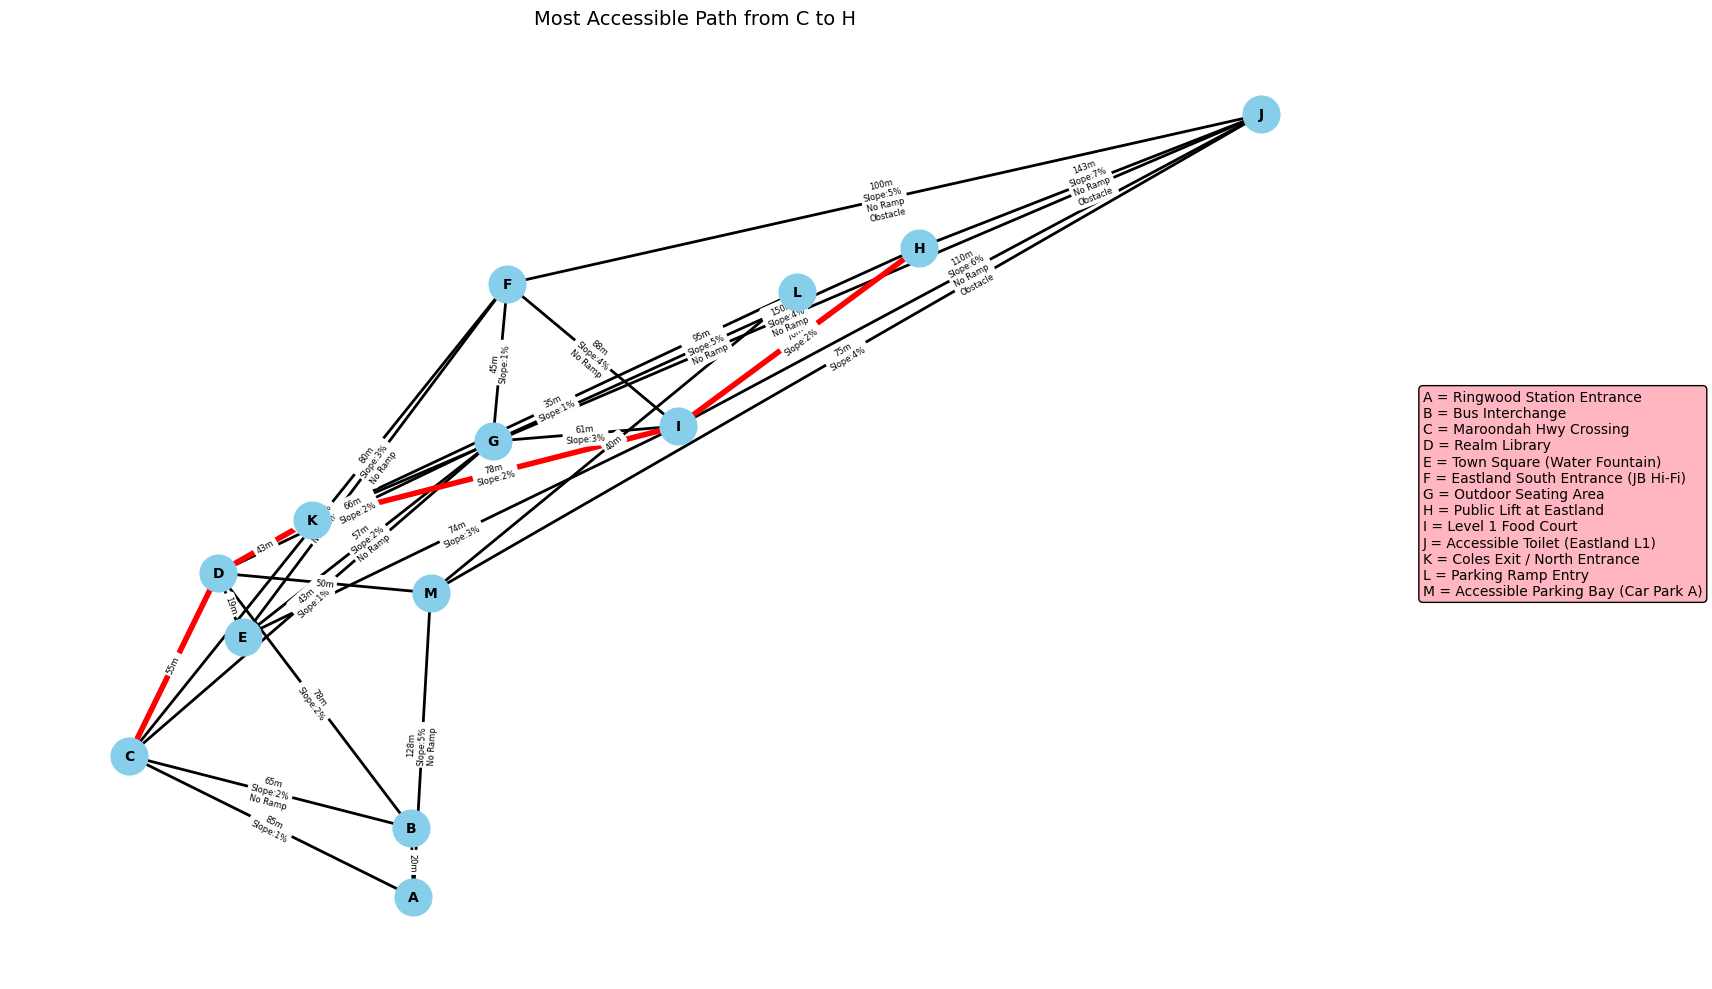

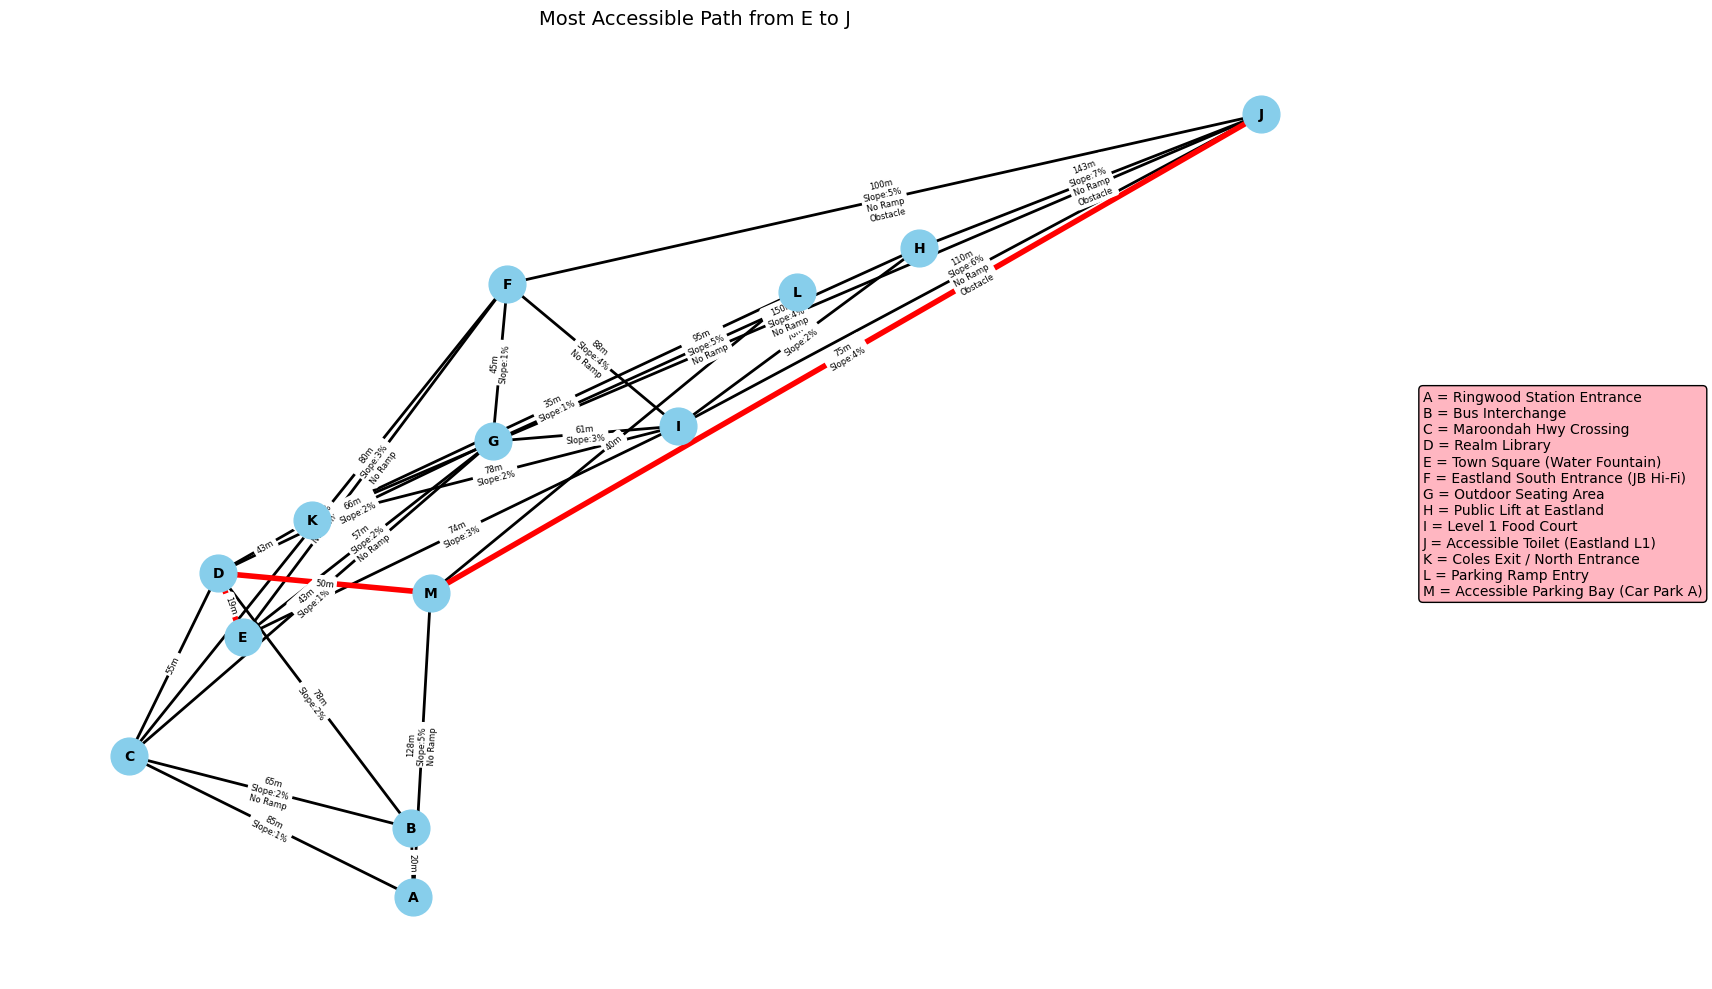

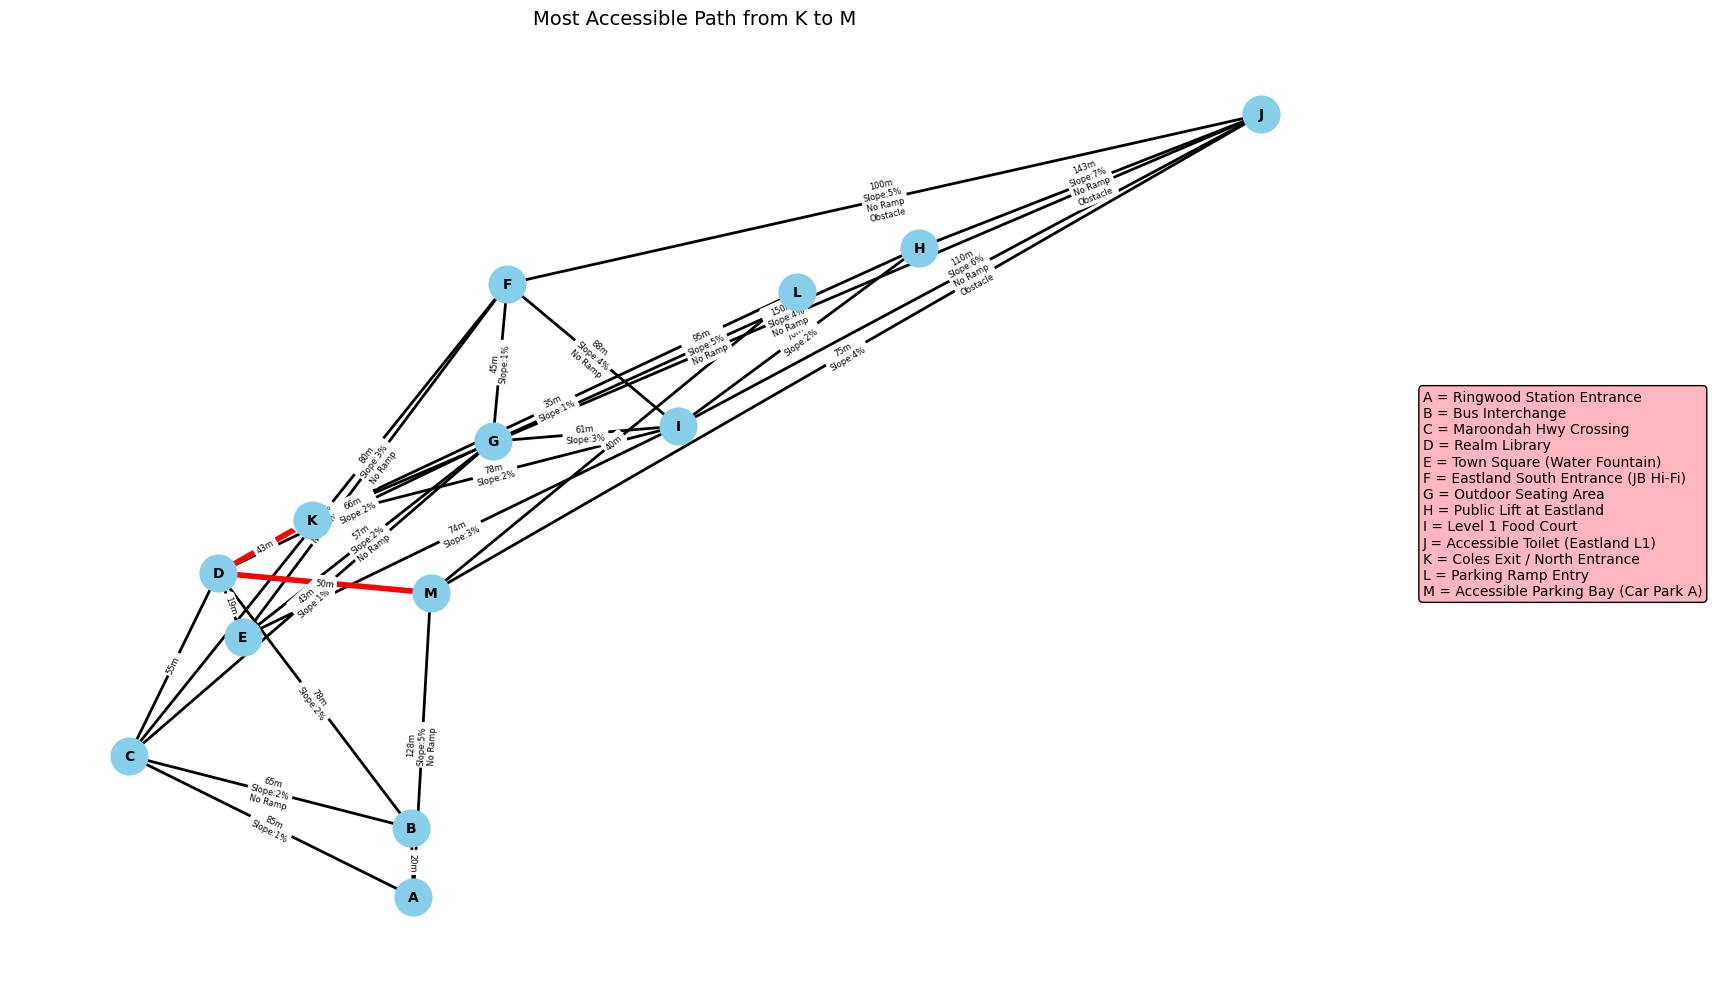

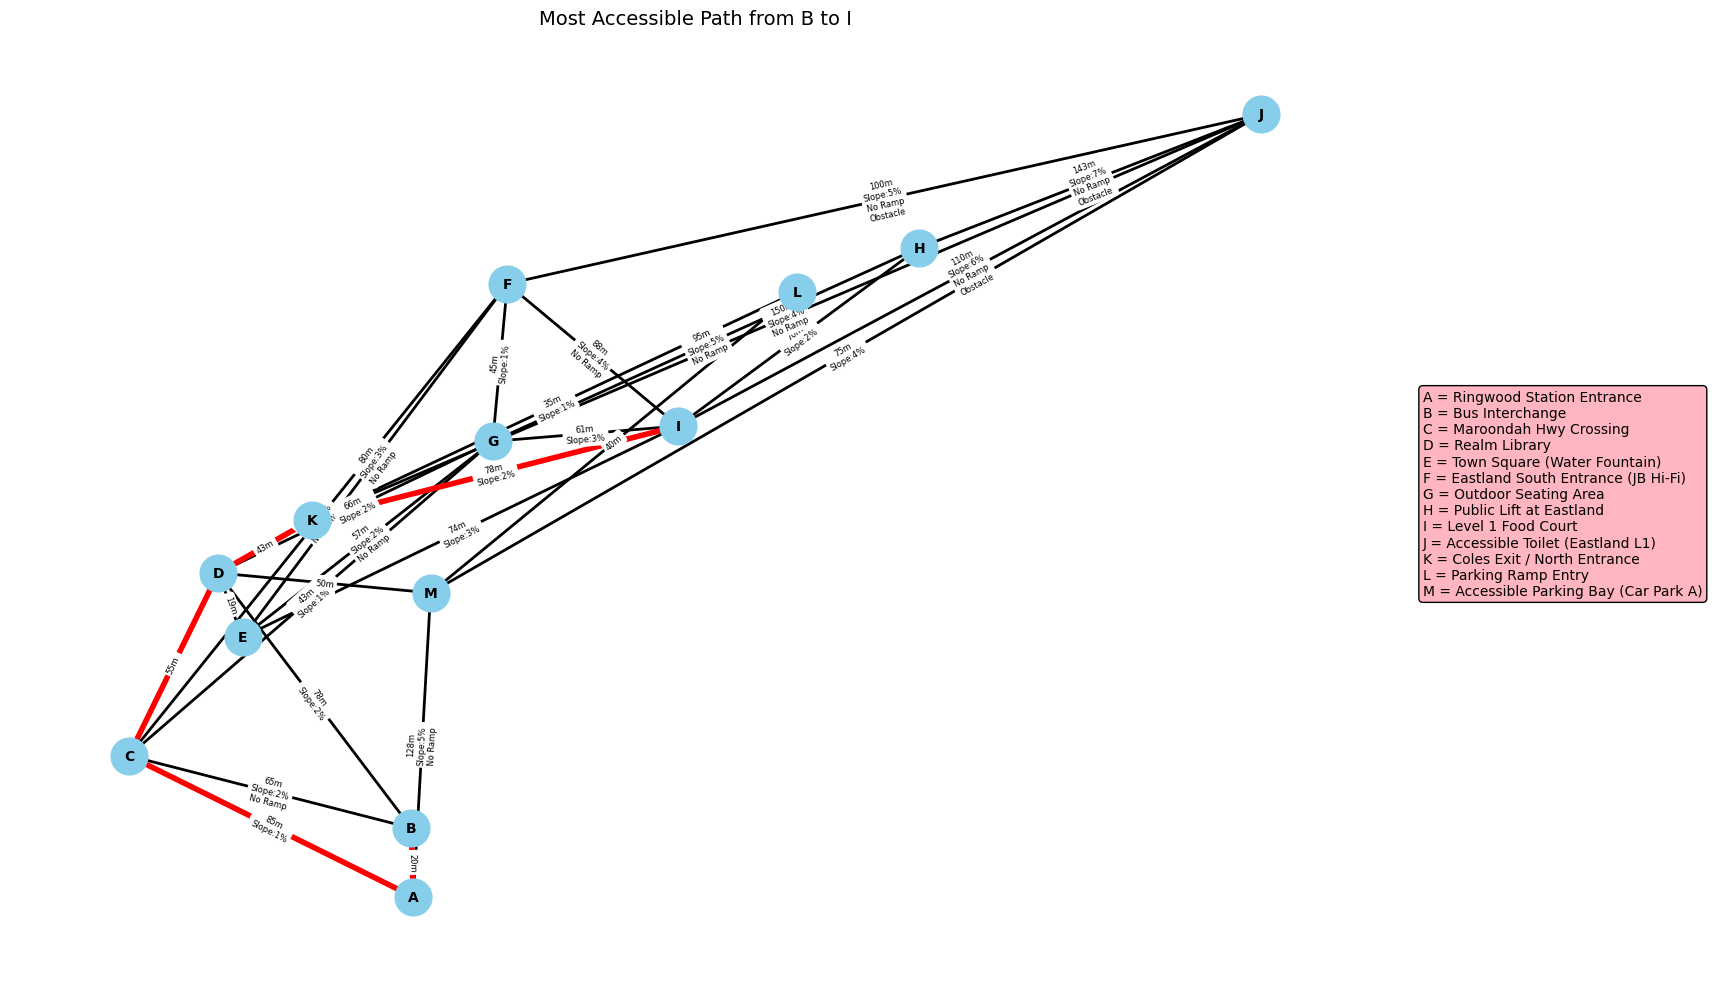

In [31]:


# --- A* algorithm ---
def a_star(graph, start, goal, cost_func):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    cost_so_far = {node: float('inf') for node in graph.nodes}
    cost_so_far[start] = 0

    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], cost_so_far[goal]
        for neighbor in graph.neighbors(current):
            edge = graph[current][neighbor]
            new_cost = cost_so_far[current] + cost_func(edge)
            if new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                heapq.heappush(open_set, (new_cost, neighbor))
                came_from[neighbor] = current
    return None, float('inf')

# --- Cost functions ---
def cost_distance(edge): return edge['cost']
def cost_accessibility(edge): return edge['slope'] * 10 + (100 if not edge['has_ramp'] else 0) + (100 if edge['has_obstacle'] else 0)

# --- Test cases ---
test_cases = [('A', 'F'), ('C', 'H'), ('E', 'J'), ('K', 'M'), ('B', 'I')]

# --- Path comparisons ---
results_distance = []
results_accessible = []
combined_results = []

for start, end in test_cases:
    path_d, cost_d = a_star(G, start, end, cost_distance)
    path_a, cost_a = a_star(G, start, end, cost_accessibility)
    total_constraint_d = sum(cost_accessibility(G[path_d[i]][path_d[i+1]]) for i in range(len(path_d)-1))
    total_distance_a = sum(cost_distance(G[path_a[i]][path_a[i+1]]) for i in range(len(path_a)-1))
    results_distance.append({"Start": start, "End": end, "Path": path_d, "Total Cost": cost_d})
    results_accessible.append({"Start": start, "End": end, "Path": path_a, "Constraint Score": cost_a})
    combined_results.append({
        "Start": start, "End": end,
        "Shortest Path": path_d, "Total Distance": cost_d,
        "Constraint Score (Shortest)": total_constraint_d,
        "Most Accessible Path": path_a, "Total Distance (Accessible)": total_distance_a,
        "Constraint Score": cost_a
    })


# --- Display tables ---
df_distance = pd.DataFrame(results_distance)
df_accessible = pd.DataFrame(results_accessible)
df_comparison = pd.DataFrame(combined_results)

print("Distance-Based Paths:\n", df_distance, "\n")
print("Accessibility-Based Paths:\n", df_accessible, "\n")
print("Comparison of Both:\n", df_comparison)

# --- Descriptions for legend ---
point_descriptions = {
    'A': "Ringwood Station Entrance", 'B': "Bus Interchange", 'C': "Maroondah Hwy Crossing",
    'D': "Realm Library", 'E': "Town Square (Water Fountain)", 'F': "Eastland South Entrance (JB Hi-Fi)",
    'G': "Outdoor Seating Area", 'H': "Public Lift at Eastland", 'I': "Level 1 Food Court",
    'J': "Accessible Toilet (Eastland L1)", 'K': "Coles Exit / North Entrance",
    'L': "Parking Ramp Entry", 'M': "Accessible Parking Bay (Car Park A)"
}

# --- Visualization ---
def visible_path(graph, path, title):
    pos = nx.get_node_attributes(graph, 'pos')
    plt.figure(figsize=(14, 10))
    nx.draw_networkx_nodes(graph, pos, node_color='skyblue', node_size=700)
    nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(graph, pos, width=2, edge_color='black')
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(graph, pos, edgelist=path_edges, width=4, edge_color='red')

    def constraint_label(d):
        labels = [f"{d['cost']}m"]
        if d['slope'] > 0:
            labels.append(f"Slope:{d['slope']}%")
        if not d['has_ramp']:
            labels.append("No Ramp")
        if d['has_obstacle']:
            labels.append("Obstacle")
        return "\n".join(labels)

    edge_labels = {(u, v): constraint_label(d) for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=6)

    legend_text = "\n".join([f"{k} = {v}" for k, v in point_descriptions.items()])
    plt.gcf().text(1.02, 0.5, legend_text, fontsize=10, va='center',
                   bbox=dict(boxstyle="round", fc="lightpink", ec="black"))

    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# --- Draw 5 most accessible paths ---
for start, end in test_cases:
    path, _ = a_star(G, start, end, cost_accessibility)
    visible_path(G, path, f"Most Accessible Path from {start} to {end}")

# 🚀 Task 4.2: Alternative Pathfinding Algorithm adjency matrix

In [27]:
# --- Import necessary libraries ---
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import heapq

# --- Define 13 points with coordinates (lat, lon) ---
points = {
    'A': (-37.8156505, 145.2294636), 'B': (-37.8154740, 145.2294588), 'C': (-37.8152886, 145.2288074),
    'D': (-37.8148201, 145.2290135), 'E': (-37.8149849, 145.2290695), 'F': (-37.8140786, 145.2296805),
    'G': (-37.8144825, 145.2296467), 'H': (-37.8139861, 145.2306309), 'I': (-37.8144433, 145.2300744),
    'J': (-37.8136444, 145.2314192), 'K': (-37.8146830, 145.2292295), 'L': (-37.8140991, 145.2303492),
    'M': (-37.8148709, 145.2295034)
}

# --- Define 20 segments with cost in meters ---
segments = [
    ('A', 'B', 20), ('B', 'C', 65), ('C', 'D', 55), ('D', 'E', 19), ('E', 'F', 80),
    ('F', 'G', 45), ('G', 'H', 95), ('H', 'I', 70), ('I', 'J', 110), ('J', 'K', 150),
    ('K', 'L', 90), ('L', 'M', 65), ('M', 'A', 128), ('D', 'K', 43), ('C', 'G', 43),
    ('E', 'G', 57), ('G', 'I', 61), ('F', 'I', 88), ('K', 'I', 78), ('H', 'J', 143)
]

# --- Step 1: Build the graph ---
G_dijkstra = nx.Graph()
for point, (lat, lon) in points.items():
    G_dijkstra.add_node(point, pos=(lon, lat))
for u, v, dist in segments:
    G_dijkstra.add_edge(u, v, cost=dist)

# --- Step 2: Define Dijkstra’s algorithm ---
def dijkstra(graph, start, goal):
    queue = []
    heapq.heappush(queue, (0, start))
    came_from = {}
    cost_so_far = {node: float('inf') for node in graph.nodes}
    cost_so_far[start] = 0

    while queue:
        current_cost, current = heapq.heappop(queue)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], cost_so_far[goal]
        for neighbor in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph[current][neighbor]['cost']
            if new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                came_from[neighbor] = current
                heapq.heappush(queue, (new_cost, neighbor))
    return None, float('inf')

# --- Step 3: Define and run test cases ---
test_cases = [
    ('A', 'F'),  # Ringwood Station to Eastland South Entrance
    ('C', 'H'),  # Maroondah Hwy Crossing to Public Lift
    ('E', 'J'),  # Town Square to Accessible Toilet
    ('K', 'M'),  # Coles Exit to Accessible Parking Bay
    ('B', 'I')   # Bus Interchange to Level 1 Food Court
]

dijkstra_results = []
for start_node, end_node in test_cases:
    path, total_cost = dijkstra(G_dijkstra, start_node, end_node)
    dijkstra_results.append({
        "Start": start_node,
        "End": end_node,
        "Path": " → ".join(path) if path else "No Path",
        "Total Cost (m)": total_cost if total_cost < float('inf') else "-"
    })

# --- Step 4: Display as DataFrame ---
df_dijkstra = pd.DataFrame(dijkstra_results)
df_dijkstra


,Start,End,Path,Total Cost (m)
0,A,F,A → B → C → G → F,173
1,C,H,C → G → H,138
2,E,J,E → D → K → J,212
3,K,M,K → L → M,155
4,B,I,B → C → G → I,169


# comparison with A* algorithm 

In [29]:
# Rebuild points, segments, and the graph since state was lost
points = {
    'A': (-37.8156505, 145.2294636), 'B': (-37.8154740, 145.2294588), 'C': (-37.8152886, 145.2288074),
    'D': (-37.8148201, 145.2290135), 'E': (-37.8149849, 145.2290695), 'F': (-37.8140786, 145.2296805),
    'G': (-37.8144825, 145.2296467), 'H': (-37.8139861, 145.2306309), 'I': (-37.8144433, 145.2300744),
    'J': (-37.8136444, 145.2314192), 'K': (-37.8146830, 145.2292295), 'L': (-37.8140991, 145.2303492),
    'M': (-37.8148709, 145.2295034)
}

segments = [
    ('A', 'B', 20), ('B', 'C', 65), ('C', 'D', 55), ('D', 'E', 19), ('E', 'F', 80),
    ('F', 'G', 45), ('G', 'H', 95), ('H', 'I', 70), ('I', 'J', 110), ('J', 'K', 150),
    ('K', 'L', 90), ('L', 'M', 65), ('M', 'A', 128), ('D', 'K', 43), ('C', 'G', 43),
    ('E', 'G', 57), ('G', 'I', 61), ('F', 'I', 88), ('K', 'I', 78), ('H', 'J', 143)
]

G_dijkstra = nx.Graph()
for point, (lat, lon) in points.items():
    G_dijkstra.add_node(point, pos=(lon, lat))
for u, v, dist in segments:
    G_dijkstra.add_edge(u, v, cost=dist)

# Redefine the heuristic and A* algorithm
def heuristic(node, goal, points):
    x1, y1 = points[node]
    x2, y2 = points[goal]
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5 * 1000

def a_star(graph, start, goal, points):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph.nodes}
    f_score[start] = heuristic(start, goal, points)

    while open_set:
        current = heapq.heappop(open_set)[1]
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], g_score[goal]
        for neighbor in graph.neighbors(current):
            tentative = g_score[current] + graph[current][neighbor]['cost']
            if tentative < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative
                f_score[neighbor] = tentative + heuristic(neighbor, goal, points)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return None, float('inf')

# Redefine test cases
test_cases = [
    ('A', 'F'), ('C', 'H'), ('E', 'J'), ('K', 'M'), ('B', 'I')
]

# Build comparison table
comparison_results = []
for start_node, end_node in test_cases:
    dijkstra_path, dijkstra_cost = dijkstra(G_dijkstra, start_node, end_node)
    a_star_path, a_star_cost = a_star(G_dijkstra, start_node, end_node, points)
    comparison_results.append({
        "Start": start_node,
        "End": end_node,
        "Dijkstra Path": " → ".join(dijkstra_path),
        "Dijkstra Cost (m)": dijkstra_cost,
        "A* Path": " → ".join(a_star_path),
        "A* Cost (m)": a_star_cost
    })

df_comparison = pd.DataFrame(comparison_results)
df_comparison


,Start,End,Dijkstra Path,Dijkstra Cost (m),A* Path,A* Cost (m)
0,A,F,A → B → C → G → F,173,A → B → C → G → F,173
1,C,H,C → G → H,138,C → G → H,138
2,E,J,E → D → K → J,212,E → D → K → J,212
3,K,M,K → L → M,155,K → L → M,155
4,B,I,B → C → G → I,169,B → C → G → I,169


# comparison with constraints and 30 segments 

In [35]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import heapq

# --- Define points ---
points = {
    'A': (-37.8156505, 145.2294636), 'B': (-37.8154740, 145.2294588), 'C': (-37.8152886, 145.2288074),
    'D': (-37.8148201, 145.2290135), 'E': (-37.8149849, 145.2290695), 'F': (-37.8140786, 145.2296805),
    'G': (-37.8144825, 145.2296467), 'H': (-37.8139861, 145.2306309), 'I': (-37.8144433, 145.2300744),
    'J': (-37.8136444, 145.2314192), 'K': (-37.8146830, 145.2292295), 'L': (-37.8140991, 145.2303492),
    'M': (-37.8148709, 145.2295034)
}

# --- Define 30 segments with constraints ---
segments_with_constraints = [
    ('A', 'B', 20, 0, True, False), ('B', 'C', 65, 2, False, False), ('C', 'D', 55, 0, True, False),
    ('D', 'E', 19, 0, True, False), ('E', 'F', 80, 3, False, False), ('F', 'G', 45, 1, True, False),
    ('G', 'H', 95, 5, False, False), ('H', 'I', 70, 2, True, False), ('I', 'J', 110, 6, False, True),
    ('J', 'K', 150, 4, False, False), ('K', 'L', 90, 3, True, False), ('L', 'M', 65, 2, True, False),
    ('M', 'A', 128, 5, False, False), ('D', 'K', 43, 0, True, False), ('C', 'G', 43, 1, True, False),
    ('E', 'G', 57, 2, False, False), ('G', 'I', 61, 3, True, False), ('F', 'I', 88, 4, False, False),
    ('K', 'I', 78, 2, True, False), ('H', 'J', 143, 7, False, True), ('J', 'M', 75, 4, True, False),
    ('M', 'L', 40, 0, True, False), ('L', 'K', 35, 1, True, False), ('D', 'M', 50, 0, True, False),
    ('A', 'C', 85, 1, True, False), ('B', 'D', 78, 2, True, False), ('C', 'F', 92, 4, False, False),
    ('D', 'G', 66, 2, True, False), ('E', 'I', 74, 3, True, False), ('F', 'J', 100, 5, False, True),
]

# --- Build the graph ---
G = nx.Graph()
for point, (lat, lon) in points.items():
    G.add_node(point, pos=(lon, lat))
for u, v, dist, slope, has_ramp, has_obstacle in segments_with_constraints:
    G.add_edge(u, v, cost=dist, slope=slope, has_ramp=has_ramp, has_obstacle=has_obstacle)

# --- Heuristic (for A*) ---
def heuristic(node, goal, points):
    x1, y1 = points[node]
    x2, y2 = points[goal]
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5 * 1000

# --- A* with distance as heuristic ---
def a_star(graph, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {node: float('inf') for node in graph.nodes}
    g_score[start] = 0
    f_score = {node: float('inf') for node in graph.nodes}
    f_score[start] = heuristic(start, goal, points)

    while open_set:
        current = heapq.heappop(open_set)[1]
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], g_score[goal]
        for neighbor in graph.neighbors(current):
            tentative = g_score[current] + graph[current][neighbor]['cost']
            if tentative < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative
                f_score[neighbor] = tentative + heuristic(neighbor, goal, points)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))
    return None, float('inf')

# --- Accessibility cost function ---
def cost_accessibility(edge):
    return edge['slope'] * 10 + (100 if not edge['has_ramp'] else 0) + (100 if edge['has_obstacle'] else 0)

# --- Dijkstra-style (accessibility optimized) ---
def dijkstra_custom(graph, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    cost_so_far = {node: float('inf') for node in graph.nodes}
    cost_so_far[start] = 0

    while open_set:
        current_cost, current = heapq.heappop(open_set)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], cost_so_far[goal]
        for neighbor in graph.neighbors(current):
            edge = graph[current][neighbor]
            new_cost = cost_so_far[current] + cost_accessibility(edge)
            if new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                heapq.heappush(open_set, (new_cost, neighbor))
                came_from[neighbor] = current
    return None, float('inf')

# --- Test cases ---
test_cases = [('A', 'F'), ('C', 'H'), ('E', 'J'), ('K', 'M'), ('B', 'I')]

# --- Comparison ---
comparison_results = []
for start, end in test_cases:
    a_path, a_cost = a_star(G, start, end)
    d_path, d_score = dijkstra_custom(G, start, end)
    a_constraint = sum(cost_accessibility(G[a_path[i]][a_path[i+1]]) for i in range(len(a_path)-1))
    d_distance = sum(G[d_path[i]][d_path[i+1]]['cost'] for i in range(len(d_path)-1))
    comparison_results.append({
        "Start": start,
        "End": end,
        "A* Path": " → ".join(a_path), "Distance (A*)": a_cost, "Constraint Score (A*)": a_constraint,
        "Accessible Path (Dijkstra)": " → ".join(d_path), "Distance (Dijkstra)": d_distance, "Constraint Score (Dijkstra)": d_score
    })

# --- Display as DataFrame ---
df_comparison = pd.DataFrame(comparison_results)
print(df_comparison)


  Start End        A* Path  Distance (A*)  Constraint Score (A*)  \
0     A   F  A → C → G → F            173                     30   
1     C   H      C → G → H            138                    160   
2     E   J  E → D → M → J            144                     40   
3     K   M      K → L → M             75                     10   
4     B   I  B → C → G → I            169                    160   

  Accessible Path (Dijkstra)  Distance (Dijkstra)  Constraint Score (Dijkstra)  
0              A → C → G → F                  173                           30  
1          C → D → K → I → H                  246                           40  
2              E → D → M → J                  144                           40  
3                  K → D → M                   93                            0  
4      B → A → C → D → K → I                  281                           30  


# 🖼️ Task 5 (Bonus): GUI for Pathfinding 

You may build a simple GUI using tkinter or PyQt. The interface should allow users to select start and end points and display path results.